### Import packages and load datasets

In [1]:
import sys
print(sys.version)


3.11.5 (v3.11.5:cce6ba91b3, Aug 24 2023, 10:50:31) [Clang 13.0.0 (clang-1300.0.29.30)]


In [2]:
import os
import pandas as pd
print(pd.__version__)

import numpy as np
print(np.__version__)

import random as rd
import pickle
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import sklearn
print(sklearn.__version__)

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import f_oneway, chi2_contingency, kruskal
from sklearn.preprocessing import OneHotEncoder
import random
from tqdm import tqdm
from sklearn.manifold import trustworthiness
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
import warnings
from statistics import mean

import umap
print(umap.__version__)


2.2.2
2.0.1
1.5.1
0.5.4


In [3]:
CD_data = pickle.load(open('Processed_Datasets/CD_prepared.pkl', 'rb'))

In [4]:
df_train = CD_data.drop(['Cluster\'s latitude coordinate', 'Cluster\'s longitude coordinate'], axis=1)
df_train = df_train.reset_index(drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9307 entries, 0 to 9306
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   midx                           9307 non-null   object 
 1   country                        9307 non-null   object 
 2   ChildDied                      9307 non-null   object 
 3   AgeOfChildAtDeath              9307 non-null   float64
 4   ChildGender_Male               9307 non-null   object 
 5   PreceedingBirthInterval(33+)   9307 non-null   object 
 6   WasBreastfed                   9307 non-null   object 
 7   HealthFacilityDelivery         9307 non-null   object 
 8   SkilledDeliveryCareProvider    9307 non-null   object 
 9   AntenatalCare(4+)              9307 non-null   object 
 10  NeonatalTetanusProtection(2+)  9307 non-null   object 
 11  IronPillsDuringPregnancy       9307 non-null   object 
 12  BabyPostnatalCheck             9307 non-null   o

In [5]:

feature_list = ['PreceedingBirthInterval(33+)', 'WasBreastfed', 'HealthFacilityDelivery', 'SkilledDeliveryCareProvider', 
            'AntenatalCare(4+)', 'NeonatalTetanusProtection(2+)', 'IronPillsDuringPregnancy',
            'BabyPostnatalCheck', 'MaternalPostpartumHealthCheck', 'MetNeedFamilyPlanning',
            'CleanCookingFuel', 'ProtectedDrinkingWaterSource', 'ImprovedToiletFacility', 
            'NonTobaccoSmoker', 'DecisionMaking_Participation', 
            'OfAgeMarriage']

selected_features = df_train[feature_list]
zero_rows = selected_features.sum(axis=1) == 0

df_train = df_train[~zero_rows]
df_train = df_train.reset_index(drop=True)

In [6]:

X_train = df_train[['PreceedingBirthInterval(33+)', 'WasBreastfed', 'HealthFacilityDelivery', 'SkilledDeliveryCareProvider', 
            'AntenatalCare(4+)', 'NeonatalTetanusProtection(2+)', 'IronPillsDuringPregnancy',
            'BabyPostnatalCheck', 'MaternalPostpartumHealthCheck', 'MetNeedFamilyPlanning',
            'CleanCookingFuel', 'ProtectedDrinkingWaterSource', 'ImprovedToiletFacility', 
            'NonTobaccoSmoker', 'DecisionMaking_Participation', 
            'OfAgeMarriage']]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9307 entries, 0 to 9306
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   PreceedingBirthInterval(33+)   9307 non-null   object
 1   WasBreastfed                   9307 non-null   object
 2   HealthFacilityDelivery         9307 non-null   object
 3   SkilledDeliveryCareProvider    9307 non-null   object
 4   AntenatalCare(4+)              9307 non-null   object
 5   NeonatalTetanusProtection(2+)  9307 non-null   object
 6   IronPillsDuringPregnancy       9307 non-null   object
 7   BabyPostnatalCheck             9307 non-null   object
 8   MaternalPostpartumHealthCheck  9307 non-null   object
 9   MetNeedFamilyPlanning          9307 non-null   object
 10  CleanCookingFuel               9307 non-null   object
 11  ProtectedDrinkingWaterSource   9307 non-null   object
 12  ImprovedToiletFacility         9307 non-null   object
 13  Non

In [7]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train), columns = encoder.get_feature_names_out(X_train.columns))
X_train_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9307 entries, 0 to 9306
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PreceedingBirthInterval(33+)_1   9307 non-null   float64
 1   PreceedingBirthInterval(33+)_2   9307 non-null   float64
 2   WasBreastfed_1                   9307 non-null   float64
 3   HealthFacilityDelivery_1         9307 non-null   float64
 4   SkilledDeliveryCareProvider_1    9307 non-null   float64
 5   AntenatalCare(4+)_1              9307 non-null   float64
 6   NeonatalTetanusProtection(2+)_1  9307 non-null   float64
 7   IronPillsDuringPregnancy_1       9307 non-null   float64
 8   BabyPostnatalCheck_1             9307 non-null   float64
 9   MaternalPostpartumHealthCheck_1  9307 non-null   float64
 10  MetNeedFamilyPlanning_1          9307 non-null   float64
 11  MetNeedFamilyPlanning_2          9307 non-null   float64
 12  CleanCookingFuel_1  

### UMAP Dimension Reduction function

In [8]:

def umap_embed(df, n_components=2, n_neighbors=500):
    warnings.filterwarnings('ignore', message="gradient function is not yet implemented for dice distance metric")
    warnings.filterwarnings('ignore', message="gradient function is not yet implemented for jaccard distance metric")
    warnings.filterwarnings('ignore', message="gradient function is not yet implemented for hamming distance metric")
  
    fit = umap.UMAP(metric='jaccard', 
                         n_neighbors=n_neighbors,
                         min_dist=0.0,
                         n_components=n_components, 
                         n_jobs=1,
                         random_state=42).fit(df)
    fit_data = pd.DataFrame(data=fit.embedding_)
        
    return fit_data, fit


### UMAP hyperparameter tuning and selecting values of K

In [9]:
def hyperparameter_tuning(df, n_components_range, n_neighbors_range, n_clusters_range, linkage_methods):
    trustworthiness_scores = {}
    overall_silhouette_scores = {}

    for n_components in tqdm(n_components_range, desc='Evaluating n_components'):
        for n_neighbors in tqdm(n_neighbors_range, desc='Evaluating n_neighbors', leave=False):
          
            fit_data, _ = umap_embed(df,
                                     n_components=n_components,
                                     n_neighbors=n_neighbors)

            ### Obtain trustworthiness score
            warnings.filterwarnings('ignore', message="gradient function is not yet implemented for jaccard distance metric")
            df_array = df.to_numpy()
            trustworthiness_score = trustworthiness(df_array,
                                                    fit_data, 
                                                    n_neighbors=n_neighbors,
                                                    metric="jaccard")
            trustworthiness_scores[n_components, n_neighbors] = trustworthiness_score

            ### Apply Hierarchical and evaluate silhouette score for different values of k
            silhouette_scores = {}
            for linkage in tqdm(linkage_methods, desc='Looping through linkage methods', leave=False):  
                for k in tqdm(n_clusters_range, desc='Looping through values of k', leave=False):
                    untrained_model = AgglomerativeClustering(n_clusters=k, 
                                                              metric = 'euclidean', 
                                                              linkage=linkage, 
                                                              distance_threshold=None)
                    trained_model = untrained_model.fit(fit_data)
                    cluster_labels = trained_model.labels_
                    score = silhouette_score(fit_data, cluster_labels)
                    silhouette_scores[linkage, k] = score

            overall_silhouette_scores[n_components, n_neighbors] = silhouette_scores

    return trustworthiness_scores, overall_silhouette_scores


In [10]:
n_components_range = range(2, 9)
n_neighbors_range = [250, 500, 1000, 1500]
n_clusters_range = range(2, 9)
linkage_methods = ['ward', 'complete', 'average', 'single']
trustworthiness_scores, overall_silhouette_scores = hyperparameter_tuning(X_train_encoded, 
                                                                          n_components_range, 
                                                                          n_neighbors_range, 
                                                                          n_clusters_range,
                                                                          linkage_methods)

Evaluating n_neighbors:   0%|                                                        | 0/4 [00:00<?, ?it/s]/Users/clairenajjuuko/Documents/SSA_ChildMortality/raw_datasets/RMNCH_Project_Code/RMNCHenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Looping through linkage methods:   0%|                                               | 0/4 [00:00<?, ?it/s]


Looping through values of k:   0%|                                                   | 0/7 [00:00<?, ?it/s]


Looping through values of k:  14%|██████▏                                    | 1/7 [00:01<00:09,  1.54s/it]


Looping through values of k:  29%|████████████▎                              | 2/7 [00:03<00:07,  1.52s/it]


Looping through values of k:  43%|██████████████████▍                        | 3/7 [00:04<00:05,  1.49s/it]


Looping through values of k:  57%|████████████████████████▌           

In [11]:
merged_dict_hyper = {key: {'Trustworthiness Score': trustworthiness_scores[key], 'Silhouette Scores': overall_silhouette_scores[key]} for key in trustworthiness_scores}
merged_df_hyper = pd.DataFrame.from_dict(merged_dict_hyper, orient='index')

merged_df_hyper.reset_index(inplace=True)
merged_df_hyper.columns = ['n_components', 'n_neighbors', 'Trustworthiness Score', 'Silhouette Scores']
merged_df_hyper['Highest Silhouette Score'] = merged_df_hyper['Silhouette Scores'].apply(lambda x: max(x.values()))
merged_df_hyper['Best k'] = merged_df_hyper['Silhouette Scores'].apply(lambda x: max(x, key=x.get))
merged_df_hyper['Average Silhouette Score'] = merged_df_hyper['Silhouette Scores'].apply(lambda x: mean(x.values()))

merged_df_hyper.to_csv('hyperparameter_file_hierarchical.csv', index=False)


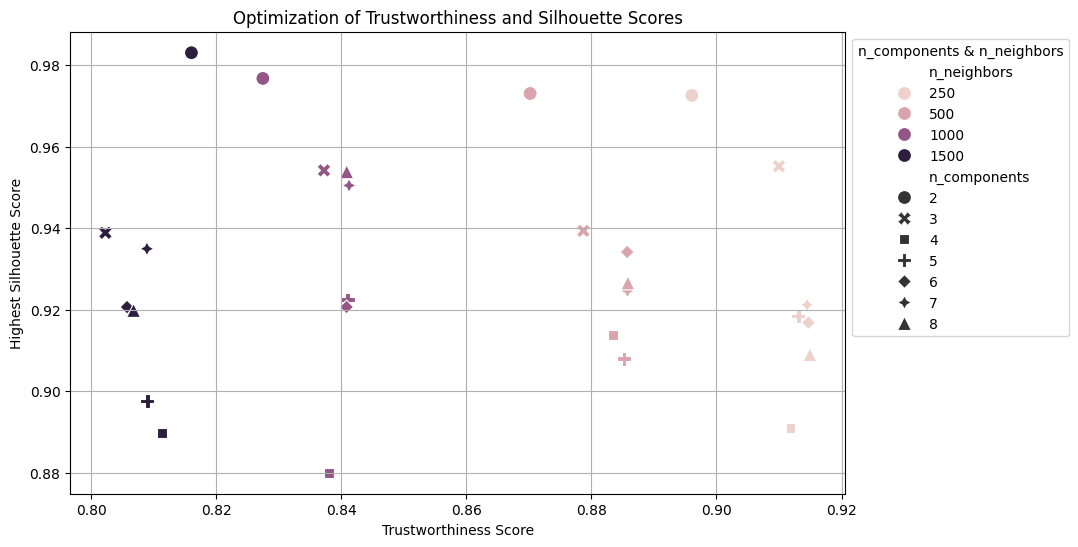

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_hyper, x='Trustworthiness Score', y='Highest Silhouette Score', style='n_components', hue='n_neighbors', s=100)
plt.title('Optimization of Trustworthiness and Silhouette Scores')
plt.xlabel('Trustworthiness Score')
plt.ylabel('Highest Silhouette Score')
plt.grid(True)
plt.legend(title='n_components & n_neighbors', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [13]:
filtered_df = merged_df_hyper[merged_df_hyper['Trustworthiness Score'] >= 0.80]

best_row = filtered_df.loc[filtered_df['Highest Silhouette Score'].idxmax()]

best_silhouette_scores = best_row['Silhouette Scores']


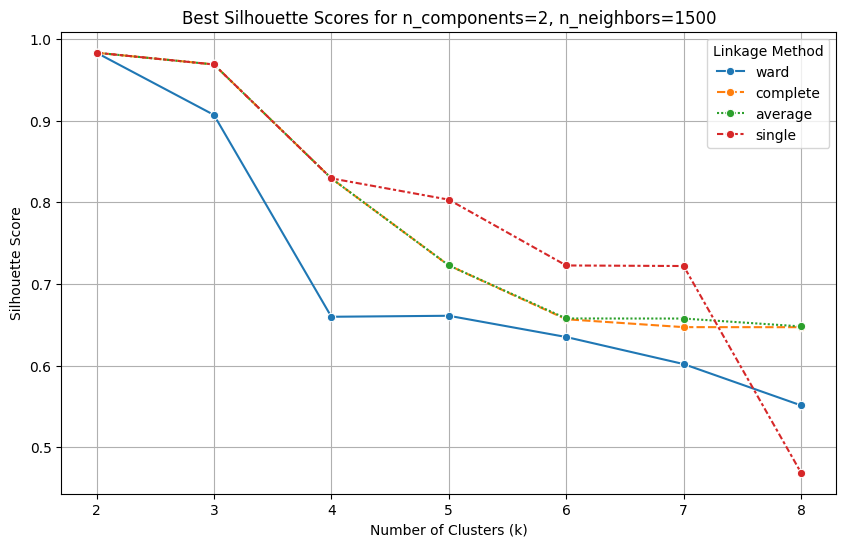

In [14]:
data = {
    'k': [],
    'Silhouette Score': [],
    'Linkage Method': []
}

for (method, k), score in best_silhouette_scores.items():
    data['k'].append(k)
    data['Silhouette Score'].append(score)
    data['Linkage Method'].append(method)

# Create DataFrame
df = pd.DataFrame(data)

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='k', y='Silhouette Score', hue='Linkage Method', marker='o', style='Linkage Method')
plt.title(f'Best Silhouette Scores for n_components={best_row["n_components"]}, n_neighbors={best_row["n_neighbors"]}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend(title='Linkage Method')
plt.show()


### Running the final selected UMAP and Hierarchical clustering fit.

In [15]:
fit_data, fit_model = umap_embed(X_train_encoded, 
                             n_components=2, 
                             n_neighbors = 1500)


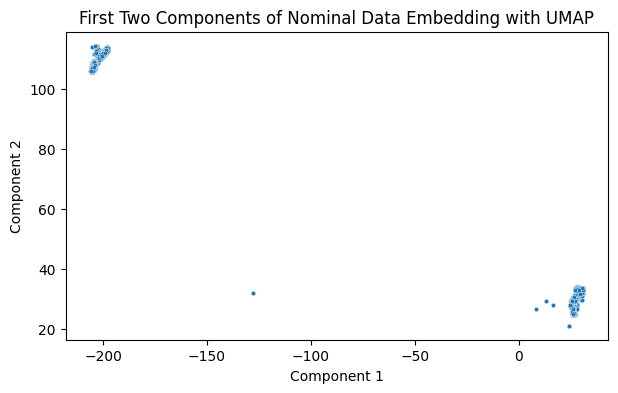

In [16]:
# Now, plotting the first two components
plt.figure(figsize=(7, 4))
sns.scatterplot(x=fit_data.iloc[:, 0], y=fit_data.iloc[:, 1], s=10)
plt.title('First Two Components of Nominal Data Embedding with UMAP')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(False)
plt.show()

In [17]:
X_transformed = fit_data
X_transformed.shape


(9307, 2)

In [18]:
## Fit the kmeans with 3 clusters
HC = AgglomerativeClustering(n_clusters=3, 
                            metric='euclidean', 
                            linkage='ward',
                            distance_threshold=None)
HC.fit_predict(X_transformed)
print(np.unique(HC.labels_))

[0 1 2]


In [19]:
df_train['Cluster Labels'] = HC.labels_

cluster_sizes = df_train[df_train['Cluster Labels'] != -1]['Cluster Labels'].value_counts().sort_values(ascending=False)

cluster_names = ['First', 
                 'Second', 
                 'Third' 
                ]
cluster_mapping = {label: name for label, name in zip(cluster_sizes.index, cluster_names)}
if -1 in df_train['Cluster Labels'].values:
    cluster_mapping[-1] = 'Not Clustered'
    cluster_names = ['Not Clustered'] + cluster_names

df_train['Segment'] = df_train['Cluster Labels'].map(cluster_mapping)
df_train['Segment'] = df_train['Segment'].astype('category')
df_train['Segment'] = df_train['Segment'].cat.reorder_categories(cluster_names)

cluster_counts = df_train['Segment'].value_counts()
cluster_counts

Segment
First     5944
Second    1752
Third     1611
Name: count, dtype: int64

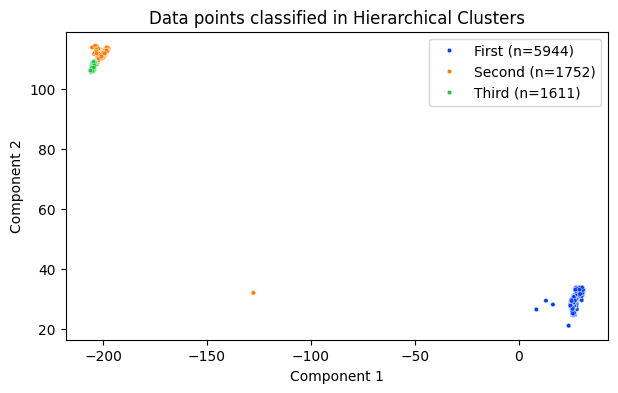

In [20]:
# Plotting the clusters with labels
plt.figure(figsize=(7, 4))
custom_palette = {'First': 'blue', 'Second': 'orange', 'Third': 'green', 'Fourth': 'brown', 'Fifth': 'red'}
scatter = sns.scatterplot(x=X_transformed[0], y=X_transformed[1], hue=df_train['Segment'], palette="bright", s=10)
plt.xlabel('Component 1')  
plt.ylabel('Component 2') 
plt.title('Data points classified in Hierarchical Clusters')
handles, labels = scatter.get_legend_handles_labels()
new_labels = [f'{label} (n={cluster_counts[label]})' for label in labels]
plt.legend(handles, new_labels)
plt.savefig('UMAP Plots/ScatterPlotUMAPEmbeddingsClusteredHierarchical.png', bbox_inches='tight')
plt.show() 


### Cluster profiling and interpretation

In [21]:
df_new1 = df_train.copy()
df_new = df_new1[['MetNeedFamilyPlanning','PreceedingBirthInterval(33+)', 'AntenatalCare(4+)', 'NeonatalTetanusProtection(2+)',
                  'IronPillsDuringPregnancy','HealthFacilityDelivery', 'SkilledDeliveryCareProvider', 
                  'BabyPostnatalCheck', 'MaternalPostpartumHealthCheck', 'WasBreastfed',
                  'ProtectedDrinkingWaterSource', 'ImprovedToiletFacility', 'CleanCookingFuel',
                  'NonTobaccoSmoker', 'DecisionMaking_Participation', 'OfAgeMarriage', 'country',
                  'Segment', 'Cluster Labels']]
df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9307 entries, 0 to 9306
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   MetNeedFamilyPlanning          9307 non-null   object  
 1   PreceedingBirthInterval(33+)   9307 non-null   object  
 2   AntenatalCare(4+)              9307 non-null   object  
 3   NeonatalTetanusProtection(2+)  9307 non-null   object  
 4   IronPillsDuringPregnancy       9307 non-null   object  
 5   HealthFacilityDelivery         9307 non-null   object  
 6   SkilledDeliveryCareProvider    9307 non-null   object  
 7   BabyPostnatalCheck             9307 non-null   object  
 8   MaternalPostpartumHealthCheck  9307 non-null   object  
 9   WasBreastfed                   9307 non-null   object  
 10  ProtectedDrinkingWaterSource   9307 non-null   object  
 11  ImprovedToiletFacility         9307 non-null   object  
 12  CleanCookingFuel               930

In [22]:
# cluster interpretation
categorical = df_new.select_dtypes(include='object')

features_to_plot = []
features_to_drop = []

def create_contingency_table(df, feature):
    contingency_table = pd.crosstab(df[feature], df['Segment'])
    return contingency_table

for feature in df_new.columns:
    if feature not in ['Segment', 'Cluster Labels', 'country']:
        if feature in categorical.columns:
            # Categorical feature, perform Chi-square test
            contingency_table = create_contingency_table(df_new, feature)
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        else:
            # Numeric feature, perform Krusals test since we dont meet homogeneity and normalty test for ANOVA test
            segments = df_new['Segment'].unique()
            groups = [df_new[df_new['Segment'] == segment][feature] for segment in segments]
            stat, p_value = kruskal(*groups)
        
        print(f"{feature}: p-value = {p_value}")        
        if p_value < 0.05/16:
            features_to_plot.append(feature)
        else:
            features_to_drop.append(feature)
print(len(features_to_plot))
print("Features to plot:", features_to_plot)
print("Features to drop:", features_to_drop)

df_new = df_new.drop(features_to_drop, axis=1)


MetNeedFamilyPlanning: p-value = 1.3047462344241509e-74
PreceedingBirthInterval(33+): p-value = 5.326183622493816e-63
AntenatalCare(4+): p-value = 0.0
NeonatalTetanusProtection(2+): p-value = 0.0
IronPillsDuringPregnancy: p-value = 0.0
HealthFacilityDelivery: p-value = 0.0
SkilledDeliveryCareProvider: p-value = 0.0
BabyPostnatalCheck: p-value = 1.7857588688193936e-94
MaternalPostpartumHealthCheck: p-value = 1.7099213443443687e-102
WasBreastfed: p-value = 2.8310125708765147e-28
ProtectedDrinkingWaterSource: p-value = 2.2510399639296555e-120
ImprovedToiletFacility: p-value = 3.2703976849128654e-145
CleanCookingFuel: p-value = 2.1924315068527485e-54
NonTobaccoSmoker: p-value = 0.7072126288434506
DecisionMaking_Participation: p-value = 2.691302744117033e-20
OfAgeMarriage: p-value = 4.394563081393655e-46
15
Features to plot: ['MetNeedFamilyPlanning', 'PreceedingBirthInterval(33+)', 'AntenatalCare(4+)', 'NeonatalTetanusProtection(2+)', 'IronPillsDuringPregnancy', 'HealthFacilityDelivery', 'S

### Radar Plot and Line Plots

In [23]:
### center and scale categorical features
categorical_columns = (df_new.select_dtypes(include=['object']).drop('country', axis=1)).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
df_dummies = pd.DataFrame(encoder.fit_transform(df_new[categorical_columns]), columns = encoder.get_feature_names_out(categorical_columns))
df_dummies_scaled = pd.DataFrame(StandardScaler().fit_transform(df_dummies), columns=df_dummies.columns)

### concatenate all the processed data
df_new = df_new.drop(categorical_columns, axis=1)
df_new = pd.concat([df_new, df_dummies_scaled], axis=1)


### get the means of features across all segments
df_new_columns = [col for col in df_new.columns if col not in ['Segment', 'country']]
aggregation_dict = {**{col: 'mean' for col in df_new_columns}}
aggregation_dict['Cluster Labels'] = 'count'
segment_summary = df_new.groupby('Segment', observed=True).agg(aggregation_dict)
segment_summary = segment_summary.drop(['MetNeedFamilyPlanning_2', 'PreceedingBirthInterval(33+)_2'], axis=1)
segment_summary


,Cluster Labels,MetNeedFamilyPlanning_1,PreceedingBirthInterval(33+)_1,AntenatalCare(4+)_1,NeonatalTetanusProtection(2+)_1,IronPillsDuringPregnancy_1,HealthFacilityDelivery_1,SkilledDeliveryCareProvider_1,BabyPostnatalCheck_1,MaternalPostpartumHealthCheck_1,WasBreastfed_1,ProtectedDrinkingWaterSource_1,ImprovedToiletFacility_1,CleanCookingFuel_1,DecisionMaking_Participation_1,OfAgeMarriage_1
Segment,,,,,,,,,,,,,,,,
First,5944,0.118363,0.062166,0.259406,0.176490,0.277176,0.699554,0.678385,0.028319,-0.002502,-0.087802,0.177772,0.189727,0.120656,0.054456,0.109874
Second,1752,-0.387106,-0.199275,-0.996270,-0.876504,-1.209169,-1.241653,-1.199355,-0.388338,-0.353507,0.151518,-0.406472,-0.476852,-0.258945,-0.202569,-0.247241
Third,1611,-0.015728,-0.012652,0.126355,0.302037,0.292322,-1.230772,-1.198667,0.317840,0.393677,0.159177,-0.213866,-0.181437,-0.163567,0.019375,-0.136515


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


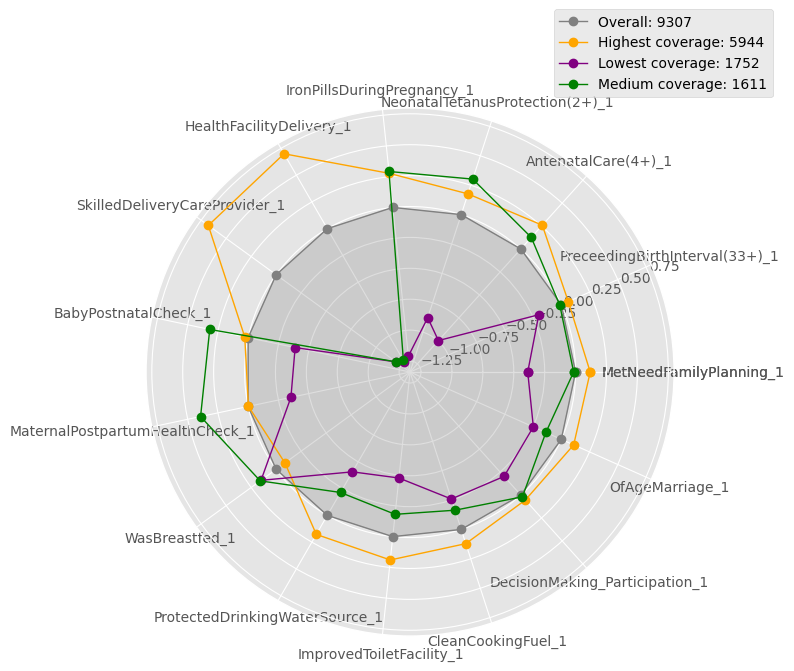

In [24]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## data for visualization
subjects = (segment_summary.drop(columns = "Cluster Labels", axis = 1).columns).to_list()
overall = np.zeros(len(subjects)).tolist()
First = (segment_summary.loc['First', subjects]).to_list()
Second = (segment_summary.loc['Second', subjects]).to_list()
Third = (segment_summary.loc['Third', subjects]).to_list()

## Obtain angles
angles=np.linspace(0,2*np.pi,len(subjects), endpoint=False)

## completing the full circle
angles=np.concatenate((angles,[angles[0]]))
subjects.append(subjects[0])
overall.append(overall[0])
First.append(First[0])
Second.append(Second[0])
Third.append(Third[0])


## Plotting
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111, polar=True)

#Overall Plot
ax.plot(angles, overall, 'o-', color='grey', linewidth=1, label='Overall: 9307')
ax.fill(angles, overall, alpha=0.25, color='grey')

#First Plot
ax.plot(angles, First, 'o-', color='orange', linewidth=1, label=f"{'Highest coverage'}: {segment_summary.loc['First','Cluster Labels']}")

# Second Plot
ax.plot(angles, Second, 'o-', color='purple', linewidth=1, label=f"{'Lowest coverage'}: {segment_summary.loc['Second','Cluster Labels']}")

# Third Plot
ax.plot(angles, Third, 'o-', color='green', linewidth=1, label=f"{'Medium coverage'}: {segment_summary.loc['Third','Cluster Labels']}")

ax.set_thetagrids(angles * 180/np.pi, subjects)
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))
plt.savefig('Radar Plots/Three_Clusters_UMAP_Hierarchical.eps', bbox_inches='tight', dpi=300)
plt.show()
